In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("WineQT.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


# Part 1: Data Cleaning

In [4]:
#Create function which shows if any column has NaN's

In [5]:
def check_NaNs(df):
    print('*******')
    count_nulls = df.isnull().sum().sum()
    if count_nulls > 0:
        for col in df.columns:
            print('NaNs in', col + ": ", df[col].isnull().sum())
    else: 
        print('No NaNs in dataframe')
    print('*******')
    print('')
check_NaNs(df)

*******
No NaNs in dataframe
*******



In [6]:
# Id's are unhelpful, so remove from dataset
df = df.drop(columns='Id')

No additional cleaning, imputation or feature engineering necessary.

# Part 2: EDA

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


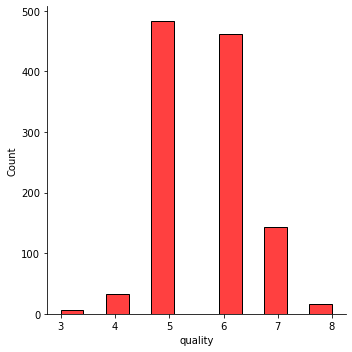

In [9]:
sns.displot(df['quality'], kde=False, bins=12, color ='red')

In [13]:
#Create correlation matrix
dfc = df.corr()

<AxesSubplot:>

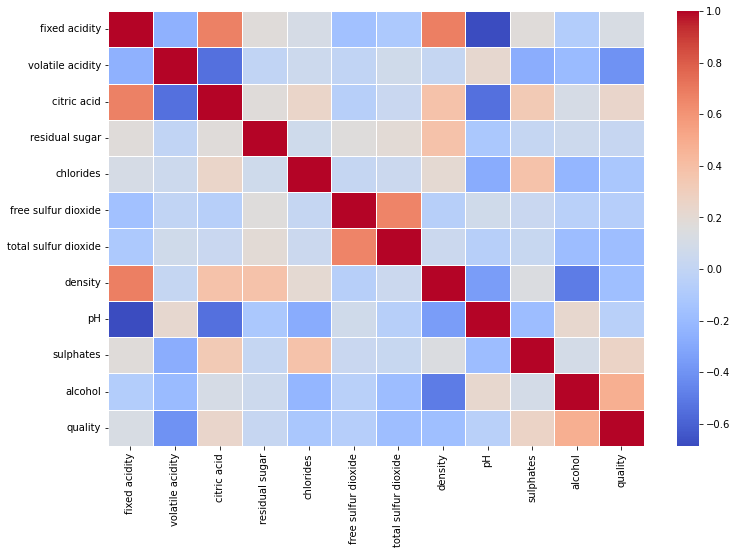

In [14]:
#Visualize correlation with heatmap
plt.figure(figsize=(12,8))
sns.heatmap(dfc, cmap='coolwarm', linecolor='white', linewidths=1)

In [12]:
dfc

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710


In [11]:
dfc['quality']

fixed acidity           0.121970
volatile acidity       -0.407394
citric acid             0.240821
residual sugar          0.022002
chlorides              -0.124085
free sulfur dioxide    -0.063260
total sulfur dioxide   -0.183339
density                -0.175208
pH                     -0.052453
sulphates               0.257710
alcohol                 0.484866
quality                 1.000000
Name: quality, dtype: float64

In [39]:
#Predictors with an absolute correlation value of more than 0.2 are important
#Alcohol, volatile acidity, sulphates and citric acid seems to be key for predicting quality.

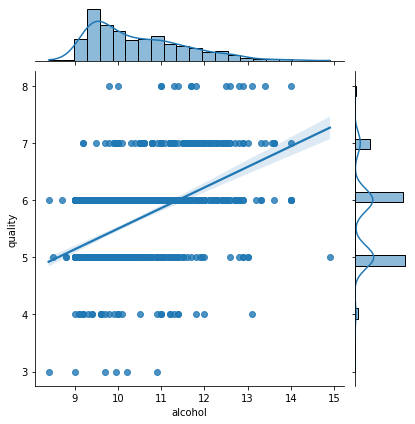

In [40]:
sns.jointplot(x='alcohol', y='quality', data=df, kind='reg')

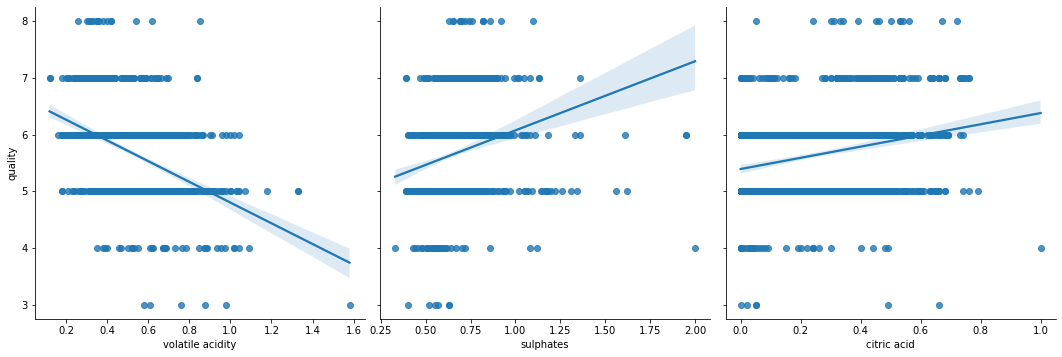

In [41]:
sns.pairplot(df, x_vars=['volatile acidity', 'sulphates', 'citric acid'], y_vars = 'quality', kind='reg', height=5)

# Part 3: Statistical Analysis

In [23]:
#Multiple linear regression with the variables we highlighted as dependent variables

In [30]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [31]:
import statsmodels.formula.api as smf

In [32]:
lm1 = smf.ols(formula='quality ~ alcohol + Q("volatile acidity") + Q("citric acid") + sulphates', data=df).fit()

In [33]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     154.9
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          7.57e-106
Time:                        18:43:53   Log-Likelihood:                -1126.1
No. Observations:                1143   AIC:                             2262.
Df Residuals:                    1138   BIC:                             2287.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.6939      0.233     11.587      0.000       2.238       3.150
alcohol                   0.3080      0.018     16.959      0.000       0.272       0.344
Q("volatile acidity")    -1.2898      0.130     -9.894      0.000      -1.546      -1.034
Q("citric acid")         -0.0263      0.120     -0.220      0.826      -0.261       0.208
sulphates                 0.6687      0.121      5.548      0.000       0.432       0.905
==============================================================================
Omnibus:                       16.927   Durbin-Watson:                   1.761
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.217
Skew:                          -0.067   Prob(JB):                     7.46e-07
Kurtosis:                       3.758   Cond. No.                         139.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
#Every coefficient is statistically significant in determining the quality of the wine except for citric acid

In [35]:
lm2 = smf.ols(formula='quality ~ alcohol + Q("volatile acidity") + sulphates', data=df).fit()

In [37]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     206.7
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          4.96e-107
Time:                        18:44:27   Log-Likelihood:                -1126.2
No. Observations:                1143   AIC:                             2260.
Df Residuals:                    1139   BIC:                             2280.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.6826      0.227     11.836      0.000       2.238       3.127
alcohol                   0.3080      0.018     16.971      0.000       0.272       0.344
Q("volatile acidity")    -1.2756      0.113    -11.263      0.000      -1.498      -1.053
sulphates                 0.6628      0.117      5.645      0.000       0.432       0.893
==============================================================================
Omnibus:                       16.995   Durbin-Watson:                   1.761
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.282
Skew:                          -0.070   Prob(JB):                     7.22e-07
Kurtosis:                       3.758   Cond. No.                         133.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# Removing citric acid leaves the R-squared (fraction of explained variance) unchanged, but the F-statistic improves and
# AIC and BIC scores are marginally lower

# Part 4: ML Classification

## Logistic Regression Classification

Since quality can take six different values we use multinomial logistic regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
# Separate dependent and independent variables
X = df.drop('quality', axis=1)
y = df['quality']

In [17]:
# Scale data to help training
scaler = StandardScaler()
scaler.fit(X)
Xscale = scaler.transform(X)

In [18]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(Xscale, y,
        test_size=0.33, random_state=42)

In [19]:
# Create a Logistic Regression model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [20]:
logreg.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

### Performance Evaluation with K-Fold Cross-Validation

In [76]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn import metrics
from numpy import mean
from numpy import std

In [41]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

In [23]:
n_scores = cross_val_score(logreg, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

In [24]:
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.594 (0.023)


### Predictions

In [74]:
pred_log = logreg.predict(X_test)

In [95]:
print("Test metrics:")
print(sklearn.metrics.classification_report(y_true= y_test, y_pred= pred_log, zero_division=1))

Test metrics:
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       0.00      0.00      0.00         9
           5       0.66      0.77      0.71       158
           6       0.60      0.63      0.61       158
           7       0.61      0.36      0.45        47
           8       1.00      0.00      0.00         5

    accuracy                           0.63       378
   macro avg       0.64      0.29      0.30       378
weighted avg       0.62      0.63      0.61       378



In [79]:
# The logistic regression model has 63 % test accuracy
# No qualities of 3, 4 or 5 are predicted

## Random Forest Classification

In [50]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import sklearn

In [43]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

### Predictions Without Tuning Hyperparameters

In [45]:
# predictions
pred_rf = rf.predict(X_test)

In [96]:
print("Test metrics:")
print(sklearn.metrics.classification_report(y_true= y_test, y_pred= pred_rf, zero_division=1))

Test metrics:
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       1.00      0.00      0.00         9
           5       0.68      0.77      0.72       158
           6       0.62      0.65      0.63       158
           7       0.72      0.55      0.63        47
           8       1.00      0.20      0.33         5

    accuracy                           0.66       378
   macro avg       0.84      0.36      0.39       378
weighted avg       0.68      0.66      0.65       378



In [52]:
# Random Forest test accuracy without tuning hyperparameters is 66%
# The model didn't predict any wine to be of quality 3 or 4

### Tuning Hyperparameters with Grid Search

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
clf = GridSearchCV(rf, param_grid={'n_estimators':[100,200],'min_samples_leaf':[2,3]})

In [63]:
# Tune
gridCV = clf.fit(X_train,y_train)

In [64]:
# Predictions with tuned model
pred_rf_grid = gridCV.predict(X_test)

In [97]:
print("Test metrics:")
print(sklearn.metrics.classification_report(y_true= y_test, y_pred= pred_rf_grid, zero_division=1))

Test metrics:
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       1.00      0.00      0.00         9
           5       0.70      0.77      0.73       158
           6       0.64      0.68      0.66       158
           7       0.66      0.49      0.56        47
           8       1.00      0.20      0.33         5

    accuracy                           0.67       378
   macro avg       0.83      0.36      0.38       378
weighted avg       0.68      0.67      0.66       378



In [66]:
# Test accuracy is now 67%, 1 percent better
# No qualities of 3 or 4 are predicted still

## Decision Tree Classification

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

### Predictions Without Tuning Hyperparameters

In [70]:
# predictions
pred_dt = dt.predict(X_test)

In [71]:
print("Test metrics:")
print(sklearn.metrics.classification_report(y_true= y_test, y_pred= pred_dt))

Test metrics:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.06      0.11      0.08         9
           5       0.65      0.66      0.66       158
           6       0.57      0.50      0.53       158
           7       0.36      0.40      0.38        47
           8       0.17      0.20      0.18         5

    accuracy                           0.54       378
   macro avg       0.30      0.31      0.31       378
weighted avg       0.56      0.54      0.55       378



In [81]:
# Test accuracy is 54 % without tuning hyperparameters
# 3 is the only quality not predicted

### Tuning Hyperparameters with Grid Search

In [102]:
param_dict = {
    "criterion":['gini','entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(2,10),
    "min_samples_leaf":range(1,5)
}

In [103]:
grid = GridSearchCV(dt, param_grid=param_dict,cv=5,verbose=0,n_jobs=1)

In [104]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10)})

In [105]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [106]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [107]:
grid.best_score_

0.5699346405228758

In [108]:
# Predictions with tuning

In [109]:
pred_dt_grid = grid.predict(X_test)

In [110]:
print("Test metrics:")
print(sklearn.metrics.classification_report(y_true= y_test, y_pred= pred_dt_grid, zero_division=1))

Test metrics:
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       1.00      0.00      0.00         9
           5       0.61      0.72      0.66       158
           6       0.53      0.51      0.52       158
           7       0.49      0.38      0.43        47
           8       1.00      0.00      0.00         5

    accuracy                           0.56       378
   macro avg       0.77      0.27      0.27       378
weighted avg       0.57      0.56      0.55       378



In [129]:
# Test accuracy is 56 % with tuned hyperparameters, 2 percent better
# Neither 3, 4 or 8 is a predicted quality

## Performance Comparison

The Random Forest Classifier performed the best with a test accuracy of 67%. The Logistic Regression Classifier was second with 63% and the Decision Tree Classifier was the worst with only 56 % test accuracy.

### Bonus: Re-training the Random Forest with Fewer Variables

In [113]:
nX = X[['volatile acidity', 'citric acid', 'sulphates', 'alcohol']]

In [114]:
scaler.fit(nX)
nXscale = scaler.transform(nX)

In [115]:
nX_train, nX_test, ny_train, ny_test = train_test_split(nXscale, y,
        test_size=0.33, random_state=42)

In [116]:
nrf = RandomForestClassifier()
nrf.fit(nX_train,ny_train)

RandomForestClassifier()

In [117]:
# predictions
pred_nrf = nrf.predict(nX_test)

In [118]:
print("Test metrics:")
print(sklearn.metrics.classification_report(y_true= ny_test, y_pred= pred_nrf, zero_division=1))

Test metrics:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         9
           5       0.69      0.77      0.73       158
           6       0.62      0.61      0.62       158
           7       0.54      0.47      0.50        47
           8       1.00      0.20      0.33         5

    accuracy                           0.64       378
   macro avg       0.47      0.34      0.36       378
weighted avg       0.63      0.64      0.63       378



In [127]:
# 64 % test accuracy with 4 variables as compared to 66 % with 12 variables

#### Tuning Hyperparameters

In [121]:
nclf = GridSearchCV(nrf, param_grid={'n_estimators':[100,200],'min_samples_leaf':[2,3]})

In [123]:
ngridCV = clf.fit(nX_train,ny_train)

In [124]:
pred_nrf_grid = ngridCV.predict(nX_test)

In [125]:
print("Test metrics:")
print(sklearn.metrics.classification_report(y_true= ny_test, y_pred= pred_nrf_grid, zero_division=1))

Test metrics:
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       1.00      0.00      0.00         9
           5       0.68      0.78      0.73       158
           6       0.61      0.63      0.62       158
           7       0.59      0.40      0.48        47
           8       1.00      0.00      0.00         5

    accuracy                           0.64       378
   macro avg       0.81      0.30      0.31       378
weighted avg       0.65      0.64      0.62       378



In [126]:
# Still 64 % accuracy